Задачи.

Загрузить датасет taxi.csv.
Изучить данные. Отобразить общую информацию по признакам. Описать свои наблюдения.
Выявить пропуски, а также возможные причины их возникновения. Решить, что следует сделать с ними. Описать свои наблюдения и решение.
Оценить и описать зависимость переменных между собой.
Определите стратегию преобразования категориальных признаков для дальнейшего построения моделей.
Найти признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалить лишние, при необходимости.
Разделить выборку на обучаемую и тестовую.
Обучить несколько моделей, выбрать критерий оценки выбрать наилучшую.
Визуализировать результаты.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

1. Загрузим датасет taxi.csv и изучим данные

In [2]:
df = pd.read_csv('taxi.csv')

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [3]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


Из названий датасета и колонок можно догадаться, что это данные о решении таксистов брать заказ или нет.
По координатам нахождения водителя и заказчика ясно, что они находятся в Москве и Московской области.

Датасет содержит 100 000 записей и 14 колонок, которые описывают информацию о координатах водителя (driver_latitude,driver_longitude), координатах заказчика (origin_order_latitude,origin_order_longitude); о дистанции, которую будет необходимо проехать (distance_km); время в пути (duration_min); класс обслуживания (offer_class_group); тип поездки (ride_type_desc); день недели (weekday_key); текущее время в часах (hour_key) и некие gk-номера водителя, предложения и заказа (offer_gk,driver_gk,order_gk).
Последний стобец - driver_response - содержит информацию о решении водителя брать заказ (=1) или нет (=0). Причем примерно в половине случаев водители берут заказ (среднее занчение этой колонки = 0,49)

Колонки offer_class_group и ride_type_desc имеют тип object, остальные - целочисленные или с плавающей точкой.

По этим данным можно построить модель, которая по входящим данным заказа будет предсказывать возьмет водитель заказ или нет.
Поэтому стобец "driver_response" будет целевой переменной. Остальные колонки будут признаками.

Такая задача относится к задачам бинарной классификации.



По всей видимости, колонки offer_gk,driver_gk,order_gk не несут информации о самом заказе, поэтому исключим их из датасета:

In [3]:
df1 = df.drop(["offer_gk","driver_gk","order_gk"],axis=1)

2. Пропущенные значения

Непосредственно из информации о датасете понятно, что пропущенных значений нет (все значения "Non-Null"). Однако в описании данных видно, что колонки driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min содержат значения = -1 или 0, что не свойственно им. Например, расстояние не может быть равным "-1 км", а координаты далеко выходят за пределы Москвы. Видимо пропущенные значения в данных заполнили "-1" и "0". С чем это связано - непонятно.

Строки, содержащие "-1", можно удалить или заменить на средние значения по столбцу.
Скомбинируем эти действия. Если координаты содержат "-1" или 0, то соответствующие строки удалим. А в колонках distance_km,duration_min значения меньшие 50 метров и 1 мин заменим на средние значения, соответственно.

In [4]:
df1 = df1.loc[(df1['driver_latitude'] != (-1&0)) & (df1['driver_longitude'] != -1) & (df1['origin_order_latitude'] !=-1) & (df1['origin_order_longitude'] != -1)]
df1.loc[df1['distance_km'] <=5e-2, 'distance_km'] = df1['distance_km'].mean()
df1.loc[df1['duration_min'] <=1, 'duration_min'] = df1['duration_min'].mean()

df1.describe()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000
mean,3.160087,13.826633,55.780883,37.546631,55.780195,37.546311,23.513892,29.513172,0.491757
std,2.054477,7.308449,0.153851,0.157053,0.156106,0.159887,39.602409,30.910428,0.499935
min,0.000000,0.000000,55.327636,36.984771,55.327917,36.994072,0.056000,1.067000,0.000000
25%,1.000000,8.000000,55.709285,37.413497,55.708502,37.407117,11.051000,20.483000,0.000000
50%,3.000000,16.000000,55.773085,37.533874,55.772734,37.532189,18.411756,23.159030,0.000000
75%,5.000000,20.000000,55.960697,37.624235,55.962035,37.624145,30.694750,37.883000,1.000000
max,6.000000,23.000000,56.174097,38.280547,56.172361,38.243608,5234.283000,3958.283000,1.000000


После удаления строк осталось 99 846 записей.

Далее еще раз обратим внимание на расстояния. Из описание максимальное значение превосходит 5 тысяч км, что несвойственно такси. Построим график.

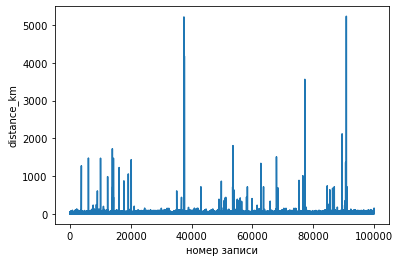

In [37]:
fig, ax = plt.subplots()
ax.plot(df1.distance_km)
ax.set_xlabel('номер записи')
ax.set_ylabel('distance_km')
plt.show()

Из графика видно, что действительно есть заказы на длинные поездки. Посчитаем их.
Например, посмотрим сколько всего заказов на более 1 тыс.км:

In [46]:
df_test = df1.loc[df1['distance_km'] >= 1e3]
df_test.describe()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,3.111111,14.277778,55.760948,37.569334,55.761700,37.576626,2139.220444,1590.754556,0.833333
std,2.025975,6.858276,0.068355,0.090331,0.068975,0.091497,1392.558142,1068.374414,0.383482
min,0.000000,0.000000,55.602245,37.405701,55.592491,37.402236,1011.973000,816.483000,0.000000
25%,1.250000,10.500000,55.725238,37.529884,55.732602,37.534240,1346.263250,911.608000,1.000000
50%,2.500000,16.500000,55.752137,37.598374,55.752235,37.612524,1477.559000,1084.333500,1.000000
75%,5.000000,19.750000,55.795481,37.625147,55.799376,37.627764,2042.688250,1608.029250,1.000000
max,6.000000,22.000000,55.904525,37.716110,55.897311,37.732915,5234.283000,3958.283000,1.000000


Из таблицы видно, что всего таких заказов 18 (0,02%). Причем, такие заказы водители берут с вероятностью более 80%.
Все эти записи оставим как есть.

3. Созависимость признаков

Сперва преобразуем признаки, имеющие тип Object (offer_class_group и ride_type_desc), в числовые:

In [5]:
for colname in df1.select_dtypes("object"):
    df1[colname], _ = df1[colname].factorize()

df1.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,18.411756,23.15903,0,0,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802000,25.21700,1,0,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747000,9.80000,0,0,0
3,2,6,55.745922,37.421748,55.743469,37.431130,18.411756,23.15903,0,0,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383000,19.25000,0,0,1


Визуализация связей между признаками:

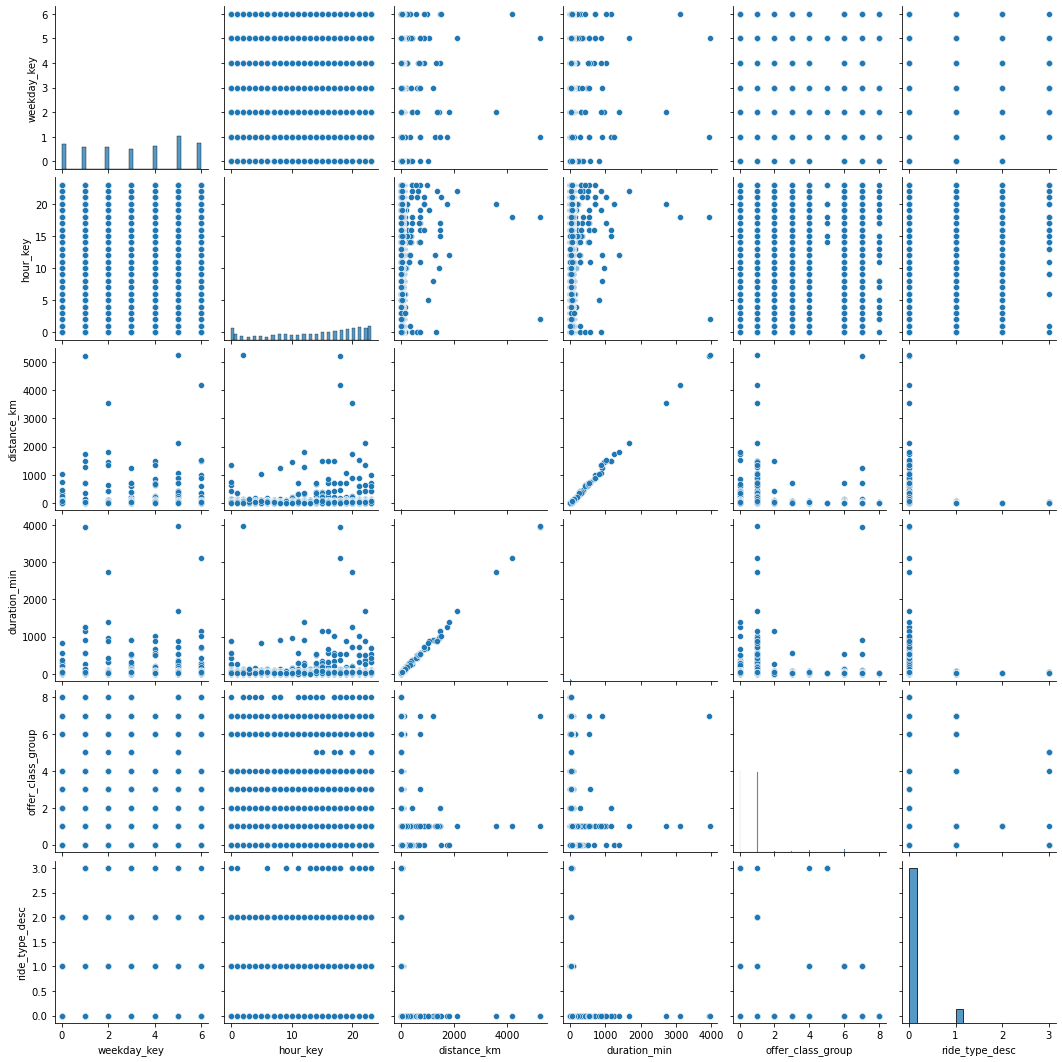

In [49]:
cols = ['weekday_key','hour_key','distance_km','duration_min','offer_class_group','ride_type_desc']
sns_plot = sns.pairplot(df1[cols])

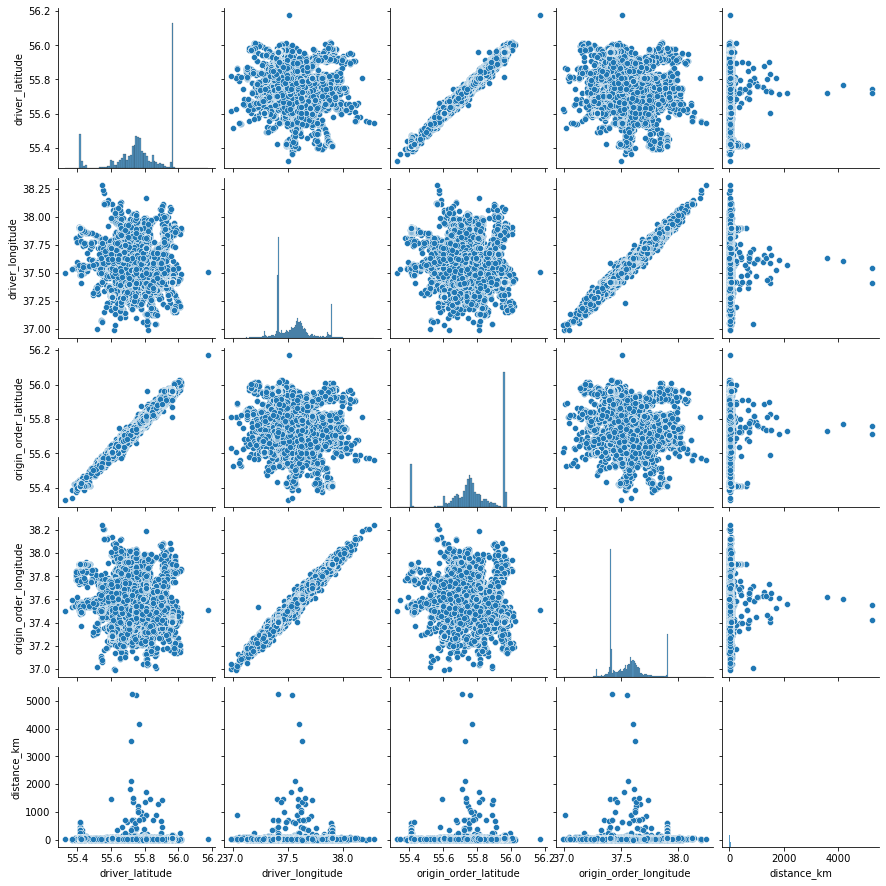

In [50]:
cols = ['driver_latitude','driver_longitude','origin_order_latitude','origin_order_longitude','distance_km']
sns_plot = sns.pairplot(df1[cols])

Выводы:
1) Координаты широты и долготы напоминают нормальное распределение
2) Зависимости близкие к линейным наблюдаются между следующими признаками:

      distance_km VS duration_min

      origin_order_longitude VS driver_longitude
      
      origin_order_latitude VS driver_latitude

Далее можно поступить двумя способами:

    1) Отбросить линейно зависимые признаки, т.к. они не будут нести новой информации для целевой переменной. 
    
    2) Перейти к новым признакам, используя PCA (Principal Component Analysis). Потом отбросить признаки, имеющие значения близкие к 0.

По всей видимости, в нашей задаче эти два варианта дадут схожие результаты после обучения модели.
Для простоты отбросим линейно зависимые признаки: duration_min, driver_longitude, driver_latitude:

In [6]:
df2 = df1.drop(["duration_min", "driver_longitude", "driver_latitude"],axis=1)
df2.describe()

,weekday_key,hour_key,origin_order_latitude,origin_order_longitude,distance_km,offer_class_group,ride_type_desc,driver_response
count,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000
mean,3.160087,13.826633,55.780195,37.546311,23.513892,0.675661,0.089728,0.491757
std,2.054477,7.308449,0.156106,0.159887,39.602409,1.030860,0.297201,0.499935
min,0.000000,0.000000,55.327917,36.994072,0.056000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,55.708502,37.407117,11.051000,0.000000,0.000000,0.000000
50%,3.000000,16.000000,55.772734,37.532189,18.411756,1.000000,0.000000,0.000000
75%,5.000000,20.000000,55.962035,37.624145,30.694750,1.000000,0.000000,1.000000
max,6.000000,23.000000,56.172361,38.243608,5234.283000,8.000000,3.000000,1.000000


4. Корреляция признаков с целевой переменной (Mutual information)

Выявим признаки, имеющие наибольшую ценность.

 В Scikit-learn в модуле eature_selection есть две метрики корреляции признаков с целевой переменной: 1) для целевой переменной с действительными значениями (relative_info_regression) и 2) для категориальных переменных (relative_info_classif). Для нашей задачи подойдет вторая метрика.

Разобъем дадасет на признаки X и целевую переменную y:

In [7]:
X = df2.copy()
y = X.pop('driver_response')

In [54]:
discrete_features = X.dtypes == int
    
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [55]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

origin_order_longitude    0.179191
hour_key                  0.043027
ride_type_desc            0.001711
Name: MI Scores, dtype: float64

Из величины "mi_scores" видно, что наибольшую корреляцию имеет признак "origin_order_longitude".

Построим график.

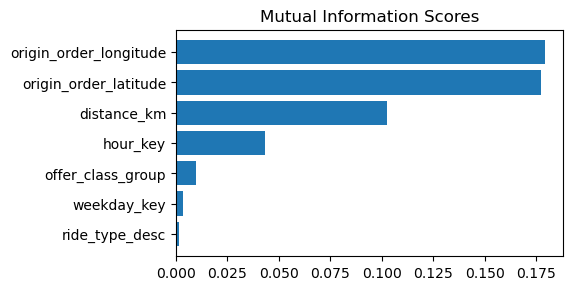

In [57]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(5, 3))
plot_mi_scores(mi_scores)

Из графика видно, что наибольшую ценность имеют широта, долгота, расстояние и текущий час дня.
Эти признаки оставим, остальные удалим:

In [8]:
df3 = df2.drop(["offer_class_group","weekday_key","ride_type_desc"],axis=1)
df3.describe()

,hour_key,origin_order_latitude,origin_order_longitude,distance_km,driver_response
count,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000
mean,13.826633,55.780195,37.546311,23.513892,0.491757
std,7.308449,0.156106,0.159887,39.602409,0.499935
min,0.000000,55.327917,36.994072,0.056000,0.000000
25%,8.000000,55.708502,37.407117,11.051000,0.000000
50%,16.000000,55.772734,37.532189,18.411756,0.000000
75%,20.000000,55.962035,37.624145,30.694750,1.000000
max,23.000000,56.172361,38.243608,5234.283000,1.000000


5. Построение моделей обучения и их оценка

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

Разделим датасет на матрицу признаков и целевой вектор:

In [10]:
X = df3.copy()
y = X.pop('driver_response')

Для удобства построения и обучения моделей воспользуемся конвеером pipeline.

Для разделения выборки на обучающую и тестовую, а также для перекрестного обучения и проверки, используем метод "cross_val_score" с пятью блоками (выборка делится на 5 частей).

В качестве метрики используем average_precision - усредненная доля правильных ответов модели в пределах класса.

In [11]:
def model_pred(model,X,y):
    my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', model)
                             ])
    scores = cross_val_score(my_pipeline, X, y, cv=5,
                              scoring='average_precision')
    return scores

1) Модель "Случайного леса" с n решающими деревьями

Для задачи классификации подойдет модель решающих деревьев и, соответственно, лес.

In [19]:
n = [2, 10, 30, 50, 70]

score_mean = []
for i in n:
    model = RandomForestRegressor(n_estimators=i, random_state=0)
    sc = np.mean(model_pred(model,X,y))
    score_mean.append(sc)

In [20]:
print("Precision_mean:\n",score_mean)

Precision_mean:
 [0.6591312720608855, 0.707433114897658, 0.7177833307818696, 0.7206579419104935, 0.722471164822327]


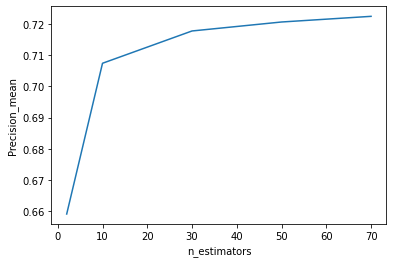

In [22]:
fig, ax = plt.subplots()
ax.plot(n,score_mean)
ax.set_xlabel('n_estimators')
ax.set_ylabel('Precision_mean')
plt.show()

Из графика видно, что при n > 70 решающих деревьев кривая выходит на насыщение.
Наилучшая точность в этой модели - 0,722.

2. Логистическая регрессия 

In [23]:
model = LogisticRegression(random_state=0)
scores = model_pred(model,X,y)

print("Precision scores:\n", scores)
print("Precision_mean:\n", np.mean(scores))

Precision scores:
 [0.54502738 0.75045663 0.60433402 0.63058318 0.69410787]
Precision_mean:
 0.6449018172831138


В модели логистической регрессии наибольшая точность во втором блоке (0,750), а средняя составляет 0,645.

Наилучший результат показала модель случайного леса с 70-ю деревьями.